## 1. 数据处理

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# 去除CarID, CarName
car_data=pd.read_csv('./car_price.csv')
data = car_data.copy().iloc[:,1:]
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [2]:
# 挑出错误信息，并修改
namedist={'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}
data['CarName']=data['CarName'].replace(namedist)
data = data.drop('CarName',axis = 1)

In [3]:
# 检查数据是否有空值
data.isnull().mean()

symboling           0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [4]:
# 检查数据是否有重复值
data.duplicated().sum()

1

In [5]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()  #将字符串编码为数字
# le.fit(data['fuelsystem'].values.tolist())
# le.classes_   #可以查看一下fit以后的类别
# le.transform(data['fuelsystem'].values.tolist())

In [6]:
# 将字符串类型的列 编码为数字
data = pd.get_dummies(data)  #后续可以考虑用PCA降维
data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
# 归一化
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler as SS
mms=MMS()
data = mms.fit_transform(data)
# ss = SS()   #涉及距离度量(聚类分析)应该使用0均值归一法
# data = ss.fit_transform(data)
data

array([[1.        , 0.05830904, 0.41343284, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.05830904, 0.41343284, ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.2303207 , 0.44925373, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.65597668, 0.7119403 , ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.65597668, 0.7119403 , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.65597668, 0.7119403 , ..., 1.        , 0.        ,
        0.        ]])

## 2. 聚类分析


### 2.1 确定K值

Text(0, 0.5, 'Silhouette Coefficient')

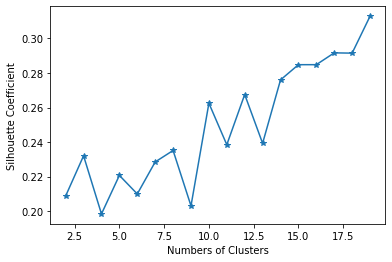

In [8]:
# 利用轮廓系数确定K值
from sklearn.metrics import silhouette_score as sil 
from sklearn.cluster import KMeans
sil_scores = []
k_list = []
for k in range(2,20,1):
    k_model = KMeans(n_clusters = k,random_state=0)  #设置随机数，保证初始点相同
    kms_model = k_model.fit(data)
    sil_score = sil(data,kms_model.labels_)
    k_list.append(k)
    sil_scores.append(sil_score)
plt.plot(k_list,sil_scores,'*-')
plt.xlabel('Numbers of Clusters')
plt.ylabel('Silhouette Coefficient')    
    

#### 发现问题：
##### 轮廓系数偏小，在kmeans簇数为[2,18]之间时，轮廓系数均低于30%；
##### k>15时随着k的增大，轮廓系数在不断增大，但聚类算法不宜选择过大的簇数；
##### 因此需要对特征向量再进行优化处理。

### 2.2 处理特征变量

In [9]:
data

array([[1.        , 0.05830904, 0.41343284, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.05830904, 0.41343284, ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.2303207 , 0.44925373, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.65597668, 0.7119403 , ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.65597668, 0.7119403 , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.65597668, 0.7119403 , ..., 1.        , 0.        ,
        0.        ]])

In [10]:
# PCA降维
def pca(X):
    X = np.mat(X)
    #求出协方差
    cov = np.dot(X.T,X)/X.shape[0]
    U,S,V = np.linalg.svd(cov)
    return U,S,V

In [11]:
U,S,V = pca(data)
U.shape

(53, 53)

In [12]:
data

array([[1.        , 0.05830904, 0.41343284, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.05830904, 0.41343284, ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.2303207 , 0.44925373, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.65597668, 0.7119403 , ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.65597668, 0.7119403 , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.65597668, 0.7119403 , ..., 1.        , 0.        ,
        0.        ]])

In [13]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X,U_reduced)

In [14]:
f_n = 12
data_reduced = project_data(data, U, f_n)

In [15]:
data_reduced.shape

(205, 12)

In [16]:
# 评估PCA降维后保留的差异性
S[:f_n].sum()/S.sum()
# 降维后可以保持超过95%的特征

0.9521400070440229

In [17]:
data_reduced

matrix([[-2.49310061, -0.60680265, -1.28694705, ...,  0.11799932,
         -0.21911497, -0.19268693],
        [-2.49833311, -0.61882378, -1.29070357, ...,  0.12627393,
         -0.21614677, -0.19327359],
        [-2.37818323, -0.87403515, -1.70489543, ..., -0.37172643,
         -0.05901605, -0.40687385],
        ...,
        [-2.69455009, -1.84946104,  0.0153045 , ..., -0.33696366,
         -0.05617497, -0.24235547],
        [-2.30102024, -1.4901528 ,  1.03405057, ..., -0.03117974,
         -0.66118394, -0.22509813],
        [-2.99161772, -1.33959624,  0.5192616 , ..., -0.10378163,
         -0.01026787, -0.08520801]])

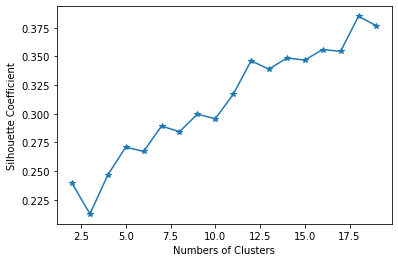

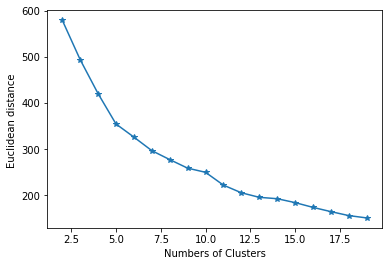

In [18]:
sil_scores = []
ed_distances = []
k_list = []
for k in range(2,20,1):
    k_model = KMeans(n_clusters = k,random_state=0)  #设置随机数，保证初始点相同
    kms_model = k_model.fit(data_reduced)
    sil_score = sil(data_reduced,kms_model.labels_)
    ed_distance = np.sum(kms_model.inertia_)
    k_list.append(k)
    sil_scores.append(sil_score)
    ed_distances.append(ed_distance)
plt.plot(k_list,sil_scores,'*-')
plt.xlabel('Numbers of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()
plt.plot(k_list,ed_distances,'*-')
plt.xlabel('Numbers of Clusters')
plt.ylabel('Euclidean distance ')    
plt.show()

##### 可以看到经过PCA降维处理后的轮廓系数和处理前相比均有了明显的提高，随着K值增大，轮廓系数整体呈现正相关，但汽车的分类数不宜过大；
##### 因此，结合肘部法则可以发现，在k=5时，SSE欧氏距离有明显拐点，且此时轮廓系数也表现较大，因此选择k=5进行聚类算法

### 2.3 聚类分析

In [19]:
kmodel=KMeans(n_clusters=5)
kms_model=kmodel.fit(data_reduced)
data_cluster = kms_model.labels_
data_cluster = pd.Series(data_cluster)
data_cluster

0      4
1      4
2      4
3      0
4      2
      ..
200    2
201    2
202    2
203    3
204    2
Length: 205, dtype: int32

In [20]:
result = pd.concat([car_data['CarName'],data_cluster],axis=1)
result = result.rename(columns={0:'Cluster'})
result

,CarName,Cluster
0,alfa-romero giulia,4
1,alfa-romero stelvio,4
2,alfa-romero Quadrifoglio,4
3,audi 100 ls,0
4,audi 100ls,2
...,...,...
200,volvo 145e (sw),2
201,volvo 144ea,2
202,volvo 244dl,2
203,volvo 246,3


In [21]:
volkswagens = result[result['CarName'].str.contains("volkswagen")]
volkswagens

,CarName,Cluster
183,volkswagen 1131 deluxe sedan,1
184,volkswagen model 111,3
185,volkswagen type 3,0
186,volkswagen 411 (sw),0
187,volkswagen super beetle,3
188,volkswagen dasher,0
191,volkswagen rabbit,2
192,volkswagen rabbit custom,3
193,volkswagen dasher,0


In [22]:
vol_dic = dict(zip(volkswagens['CarName'],volkswagens['Cluster']))
for type in vol_dic.keys():
    comp_pro = result[result['Cluster']==vol_dic.get(type)]['CarName'].unique()
    print(type + " has " +str(len(comp_pro))+" compatible products in total:")
    print(comp_pro)
    print('-'*100)

volkswagen 1131 deluxe sedan has 43 compatible products in total:
['chevrolet impala' 'chevrolet monte carlo' 'dodge rampage'
 'dodge challenger se' 'dodge d200' 'dodge coronet custom'
 'dodge coronet custom (sw)' 'honda civic' 'honda civic cvcc'
 'honda accord cvcc' 'honda accord' 'honda civic 1300'
 'honda civic (auto)' 'isuzu D-Max ' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda 626' 'mazda glc custom' 'mitsubishi mirage'
 'mitsubishi lancer' 'mitsubishi outlander' 'mitsubishi g4'
 'mitsubishi mirage g4' 'Nissan versa' 'nissan rogue' 'nissan leaf'
 'nissan juke' 'nissan clipper' 'plymouth fury iii' 'plymouth cricket'
 'renault 5 gtl' 'saab 99e' 'saab 99le' 'saab 99gle' 'subaru' 'subaru dl'
 'toyota corona mark ii' 'toyota corona' 'toyota corolla liftback'
 'volkswagen 1131 deluxe sedan' 'vw dasher' 'vw rabbit']
----------------------------------------------------------------------------------------------------
volkswagen model 111 has 19 compatible products in total:
['ma

1. 虽然聚类算法一般用0均值归一化方法，但此处不同车款的数据不服从正态分布，所以应该用min-max归一化
2. 分类变量编码处理，由于聚类算法的损失函数计算的是各特征的欧式距离，分类变流量处理后的数值大小会对分类结果有影响，因此和LabelEncoder方法相比，采用get_dummies()方法，但这种方法在另一方面也增多了特征变量个数，使计算更加复杂
3. 通过PCA降维，保留前12个特征值，使特征向量间的相关性最小化，同时保留了超过95%的数据特征
4. 结合肘部法则和轮轮廓系数法两种方法，选择簇数k值为5